This notebook includes the 4th step in a Machine Learning process; i.e. modeling. 


The data comes from [Wages By Education](https://www.kaggle.com/datasets/asaniczka/wages-by-education-in-the-usa-1973-2022), from Kaggle.

In this notebook:

<ol>
  <li><a href="#setup">Setup</a></li>
  <li><a href="#load">Loading the data</a></li>
  <li><a href="#data.prep">Preparing modeling data</a>
    <ol>
      <li><a href="#data.split">Splitting the data</a></li>
      <li><a href="#data.scale">Scaling the data</a></li>
    </ol>
  </li>
  <li><a href="#modeling">Modeling</a>
    <ol>
      <li><a href="#lin.reg">Linear Regression</a>
        <ol>
          <li><a href="#lr.eval">LR Evaluation</a></li>
          <li><a href="#lr.issues">Issues with LR</a></li>
        </ol>
      </li>
      <li><a href="#dec.tree">Decision Trees</a>
        <ol>
          <li><a href="#dt.eval">DT Evaluation</a></li>
        </ol>
      </li>
      <li><a href="#rand.for">Random Forests</a>
        <ol>
          <li><a href="#rf.eval">RF Evaluation</a></li>
          <li><a href="#rf.tune">RF Tuning</a></li>
        </ol>
      </li>
    </ol>
  </li>
  <li><a href="#model.pick">Picking a Model</a></li>
  <li><a href="#fut.pred">Future Predictions</a></li>
</ol>


<a id='setup'></a>
## 1. Setup

In [1]:
#importing data manipulation Libraries
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# supress future warning messages
import warnings
warnings.filterwarnings("ignore")

<a id='load'></a>

## 2. Loading the data

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.head()

,year,Hourly.Salary,Sex_male,Race_hispanic,Race_white,Education_bachelors_degree,Education_high_school,Education_less_than_hs,Education_some_college
0,2022,16.52,False,True,False,False,False,True,False
1,2021,16.74,False,True,False,False,False,True,False
2,2020,17.02,False,True,False,False,False,True,False
3,2019,16.11,False,True,False,False,False,True,False
4,2018,15.94,False,True,False,False,False,True,False


<a id='data.prep'></a>
## 3. Preparing modeling data

In order to avoid data leakage, we first need to split the data, then `fit` the scaler on the training data, followed by `transform`ing both the training and test sets on the same scaler.

<a id='data.split'></a>
### 3.1. Splitting the data

Choosing "Hourly.Salary" as our dependent variable to be predicted, I first define `X` and `y` sets to be split to training and test sets after.

For training and test set split, I chose to use 25% of the data as my test set. 

In [4]:
X = df.drop('Hourly.Salary', axis =1)
y = df['Hourly.Salary']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 42)

<a id='data.scale'></a>

### 3.2. Scaling the data



In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

<a id='modeling'></a>

## 4. Modeling

<a id='lin.reg'></a>

### 4.1. Linear Regression 


In [7]:
lr = LinearRegression()
lr.fit(scaled_X_train, y_train)
y_pred = lr.predict(scaled_X_test)

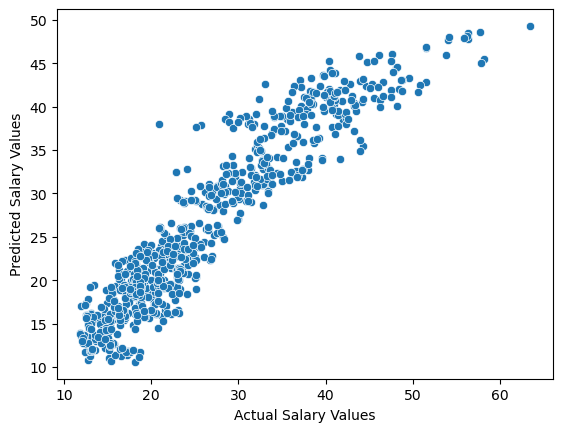

In [8]:
sns.scatterplot(x= y_test, y= y_pred)
plt.xlabel('Actual Salary Values')
plt.ylabel('Predicted Salary Values')
plt.show();

<a id='lr.eval'></a>
#### 4.1.1. LR Evaluation



In [9]:
print('Training Score: ', lr.score(scaled_X_train,y_train))
print('Testing Score: ', lr.score(scaled_X_test,y_test))

Training Score:  0.8712566280225256
Testing Score:  0.8840966199753235


In [10]:
# Calculate evaluation metrics
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_r_squared = r2_score(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)

In [11]:
print("MAE =", round(lr_mae,2), ", meaning the model's prediction is {} dollars off".format(round(lr_mae, 2)))

MAE = 2.71 , meaning the model's prediction is 2.71 dollars off


In [12]:
print("R^2 =", round(lr_r_squared,2), ", meaning the model can expplain {}% of the variance in hourly salaries".format(round(lr_r_squared,2)*100))

R^2 = 0.88 , meaning the model can expplain 88.0% of the variance in hourly salaries


In [13]:
print("MSE =", round(lr_mse,2))
print("RMSE =", round(lr_rmse,2))

MSE = 12.44
RMSE = 3.53


<a id='lr.issues'></a>

#### 4.1.2. Issues with LR

The LR model assumes linear relation between the independent and dependent variables. To confirm this assumption, we can plot the residuals. 

A well-behaved residual plot would have the residuals spread out equally around the 0 line (linear relationship), with the residuals creating a horizontal band around the 0 line (equal variance of error), and no residual standing out from the basic pattern or else we have outliers ([REF](https://online.stat.psu.edu/stat462/node/117/)).

The below plot, however, does not confirm this assumption. The residual plot resembles a "right-opening megaphone" (see the picture below, taken from "Weisberg, Sanford. *Applied linear regression*. Fourth Edition. John Wiley & Sons, 2014.")

![Residual Plots](residual_plots.png)

This suggests that the relation between our dependent and independent variables is **not linear**. Additionally, the variance in errors is not constant, meaning they are not **identically distributed** in violation of one of our IID (Independent and Identically Distributed) assumptions. 



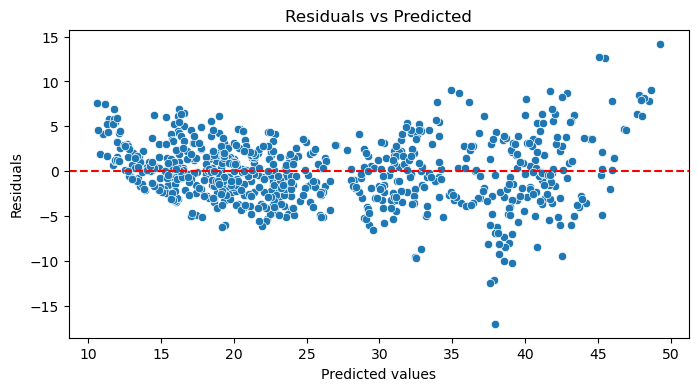

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


This suggests we need to try non-linear modeling, which is attempted below, with Decision Trees and Random Forests models.


<a id='dec.tree'></a>
### 4.2. Decision Trees
    



Decision tree does not need scaling. Using the original data

In [15]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

<a id='dt.eval'></a>
#### 4.2.1. DT Evaluation

In [16]:
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r_squared = r2_score(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)

In [17]:
print("MAE =", round(dt_mae,2), ", meaning the model's prediction is {} dollars off".format(round(dt_mae, 2)))

MAE = 3.02 , meaning the model's prediction is 3.02 dollars off


In [18]:
print("R^2 =", round(dt_r_squared,2), ", meaning the model can expplain {}% of the variance in hourly salaries".format(round(dt_r_squared,2)*100))

R^2 = 0.85 , meaning the model can expplain 85.0% of the variance in hourly salaries


In [19]:
print("MSE =", round(dt_mse,2))
print("RMSE =", round(dt_rmse,2))

MSE = 16.26
RMSE = 4.03


The untuned DT model is not up to par with the LR model. However, we can tune hyperparameters to achieve better performance. To do so, I will use `GridSearch` to first find the best hyperparameters, and then, will train a model using those.

Draw the classes? i.e decision branches

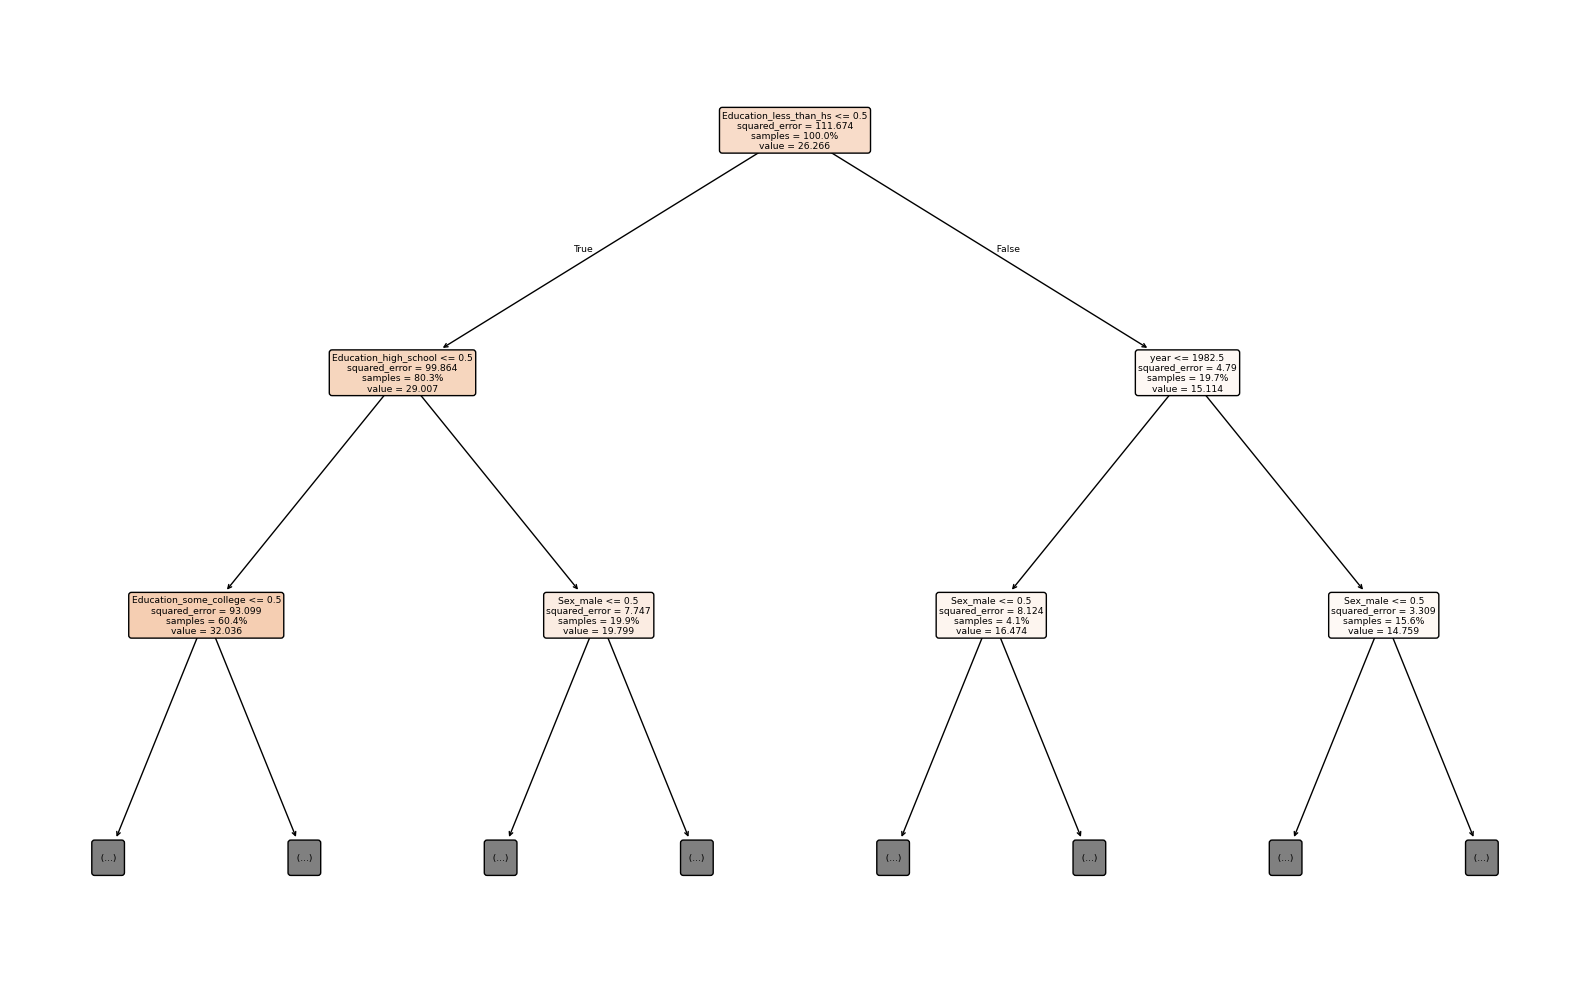

In [20]:
plt.figure(figsize=(16, 10))
plot_tree(
    dt,
    feature_names=X_train.columns,
    filled=True,
    max_depth=2,           
    proportion=True,       
    rounded=True
)
plt.tight_layout()
plt.show()


In [21]:

tree_rules = export_text(dt, feature_names=list(X_train.columns), max_depth=3)
print(tree_rules)


|--- Education_less_than_hs <= 0.50
|   |--- Education_high_school <= 0.50
|   |   |--- Education_some_college <= 0.50
|   |   |   |--- Education_bachelors_degree <= 0.50
|   |   |   |   |--- truncated branch of depth 16
|   |   |   |--- Education_bachelors_degree >  0.50
|   |   |   |   |--- truncated branch of depth 14
|   |   |--- Education_some_college >  0.50
|   |   |   |--- Sex_male <= 0.50
|   |   |   |   |--- truncated branch of depth 16
|   |   |   |--- Sex_male >  0.50
|   |   |   |   |--- truncated branch of depth 10
|   |--- Education_high_school >  0.50
|   |   |--- Sex_male <= 0.50
|   |   |   |--- Race_white <= 0.50
|   |   |   |   |--- truncated branch of depth 13
|   |   |   |--- Race_white >  0.50
|   |   |   |   |--- truncated branch of depth 11
|   |   |--- Sex_male >  0.50
|   |   |   |--- year <= 1982.50
|   |   |   |   |--- truncated branch of depth 6
|   |   |   |--- year >  1982.50
|   |   |   |   |--- truncated branch of depth 9
|--- Education_less_than_hs > 

To have an idea of how to set up our grid search, let's check the model's output metadata:

In [22]:
dt.get_depth()

19

In [23]:
dt.get_metadata_routing()

{'fit': {'sample_weight': None}, 'score': {'sample_weight': None}}

In [24]:
dt.get_n_leaves()

920


<a id='dt.tune'></a>
#### 4.2.2. DT Tuning



In [25]:
param_grid = {'max_depth':np.arange(1,19),
              'criterion': ["friedman_mse", "absolute_error", "poisson"],
             'min_samples_leaf':np.arange(1,19),
             }

dt = DecisionTreeRegressor(random_state=42)
dt_gs = GridSearchCV(dt, param_grid = param_grid, cv = 5)

dt_gs.fit(X_train,y_train)

,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'criterion': ['friedman_mse', 'absolute_error', ...], 'max_depth': array([ 1, 2...7, 18]), 'min_samples_leaf': array([ 1, 2...7, 18])}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [26]:
print("Best Score:" + str(dt_gs.best_score_))
print("Best Parameters: " + str(dt_gs.best_params_))

Best Score:0.9084209418322292
Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 8, 'min_samples_leaf': 6}


So, setting the hyperparameters to the specified ones, we can get 0.91 R^2 score, which is almost 3% improvement on the LR model.  

In [27]:
dt_tuned= DecisionTreeRegressor(random_state = 42,
                                criterion = 'friedman_mse',
                                max_depth= 8,
                                min_samples_leaf = 6)

In [28]:
dt_tuned.fit(X_train,y_train)
dt_tuned_y_pred = dt_tuned.predict(X_test)

In [29]:
dt_tuned.score(X_train,y_train)

0.9246726191784331

In [30]:
dt_tuned.score(X_test,y_test)

0.9035199191245159

In [31]:
dt_tuned_mae = mean_absolute_error(y_test, dt_tuned_y_pred)
dt_tuned_mse = mean_squared_error(y_test, dt_tuned_y_pred)
dt_tuned_r_squared = r2_score(y_test, dt_tuned_y_pred)
dt_tuned_rmse = np.sqrt(dt_tuned_mse)

<a id='rand.for'></a>
### 4.3. Random Forests


In [32]:
rf = RandomForestRegressor(random_state=42, n_jobs = -1)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)


<a id='rf.eval'></a>
#### 4.3.1. RF Evaluation



In [33]:
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r_squared = r2_score(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

In [34]:
print("MAE =", round(rf_mae,2), ", meaning the model's prediction is {} dollars off".format(round(rf_mae, 2)))

MAE = 2.81 , meaning the model's prediction is 2.81 dollars off


In [35]:
print("R^2 =", round(rf_r_squared,2), ", meaning the model can expplain {}% of the variance in hourly salaries".format(round(rf_r_squared,2)*100))

R^2 = 0.87 , meaning the model can expplain 87.0% of the variance in hourly salaries


In [36]:
print("MSE =", round(rf_mse,2))
print("RMSE =", round(rf_rmse,2))

MSE = 13.99
RMSE = 3.74


In [37]:
dt_tuned_r_squared

0.9035199191245159

In [38]:
data = {
    'Model': ['Linear Regression', 'Decision Trees', 'Tuned Decision Trees', 'Random Forests'],
    'RMSE': [lr_rmse, dt_rmse, dt_tuned_rmse, rf_rmse],
    'R-squared': [lr_r_squared, dt_r_squared, dt_tuned_r_squared, rf_r_squared]
}

comparison_df = pd.DataFrame(data)
comparison_df.sort_values('R-squared', ascending = False)


,Model,RMSE,R-squared
2,Tuned Decision Trees,3.217546,0.903520
0,Linear Regression,3.526582,0.884097
3,Random Forests,3.740412,0.869615
1,Decision Trees,4.031768,0.848512


Untuned RF model has a close performance to the LR model. However, we can achieve better results if we tune the model. To have an idea of what we already have in the untuned model, let's see the maximum depth the model has reached, so that our parameter tuning is not too much outside range. 

In [39]:
tree_depths = [estimator.tree_.max_depth for estimator in rf.estimators_]
print("Max depth:", max(tree_depths))

Max depth: 24


<a id='rf.tune'></a>
#### 4.3.2. RF Tuning

Given that GridSearch is computationally costly and slow on top of RF being slow as well, I use RandomizedSearch here, and set it to run and compare 20 models. 


In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'max_depth': [10, 15, 20, 25],
    'criterion': ['friedman_mse', 'squared_error', 'absolute_error'],
    'min_samples_leaf': [1, 5, 10, 15],
    'n_estimators': [100, 150, 200]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

rf_rs = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,  
    cv=5,
    n_jobs=-1
)

rf_rs.fit(X_train, y_train)


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'criterion': ['friedman_mse', 'squared_error', ...], 'max_depth': [10, 15, ...], 'min_samples_leaf': [1, 5, ...], 'n_estimators': [100, 150, ...]}"
,n_iter,20
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [41]:
print("Best Score:" + str(rf_rs.best_score_))
print("Best Parameters: " + str(rf_rs.best_params_))

Best Score:0.9107899866873334
Best Parameters: {'n_estimators': 150, 'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'friedman_mse'}


In [42]:
rf_tuned = RandomForestRegressor(random_state=42,
                                 criterion= 'squared_error',
                                 max_depth= 10, 
                                 min_samples_leaf= 5,
                                 n_estimators= 100,
                                 n_jobs = -1)
rf_tuned.fit(X_train, y_train)
rf_tuned_y_pred = rf_tuned.predict(X_test)

In [43]:
rf_tuned_mae = mean_absolute_error(y_test, rf_tuned_y_pred)
rf_tuned_mse = mean_squared_error(y_test, rf_tuned_y_pred)
rf_tuned_r_squared = r2_score(y_test, rf_tuned_y_pred)
rf_tuned_rmse = np.sqrt(rf_tuned_mse)



<a id='model.pick'></a>
## 5. Picking a Model



In [44]:
data2 = {
    'Model': ['Linear Regression', 'Decision Trees', 'Tuned Decision Trees', 'Random Forests', 'Tuned Random Forest'],
    'RMSE': [lr_rmse, dt_rmse, dt_tuned_rmse, rf_rmse, rf_tuned_rmse],
    'R-squared': [lr_r_squared, dt_r_squared, dt_tuned_r_squared, rf_r_squared, rf_tuned_r_squared]
}

comparison_df2 = pd.DataFrame(data2)
comparison_df2.sort_values('R-squared', ascending = False)

,Model,RMSE,R-squared
4,Tuned Random Forest,3.127166,0.908864
2,Tuned Decision Trees,3.217546,0.903520
0,Linear Regression,3.526582,0.884097
3,Random Forests,3.740412,0.869615
1,Decision Trees,4.031768,0.848512


<div style="text-align: center;">
  <h5 style="color: rebeccapurple; border: 1px solid purple; padding: 5px; border-radius: 5px; display: inline-block;">
    Best model: Tuned Random Forests
  </h5>
</div>


Given the lower RMSE and higher R-squared metric values for tuned RF model, I choose this model as the one I will use to make predictions.


Let's visualize the fit of the model by drawing a scatterplot for the actual test values and the predicted ones.


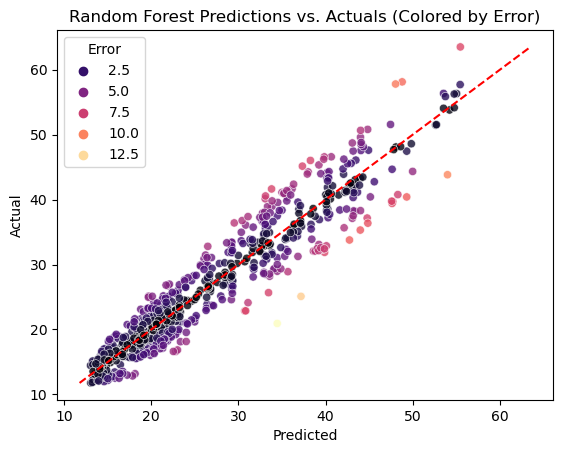

In [45]:
errors = np.abs(rf_tuned_y_pred - y_test)

sns.scatterplot(x= rf_tuned_y_pred,
                y= y_test,
                hue= errors,
                alpha= 0.8,
                palette='magma')


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Predictions vs. Actuals (Colored by Error)')
plt.legend(title='Error')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


<a id='fut.pred'></a>

## 6. Future Predictions

In [46]:
model = rf_tuned

In [47]:
new_data_male = pd.DataFrame([{
    'year': 2050,
    'Sex_male': True,
    'Race_hispanic': False,
    'Race_white': True,
    'Education_bachelors_degree': True,
    'Education_high_school': False,
    'Education_less_than_hs': False,
    'Education_some_college': False
    }])

new_data_female = pd.DataFrame([{
    'year': 2050,
    'Sex_male': False,
    'Race_hispanic': False,
    'Race_white': True,
    'Education_bachelors_degree': True,
    'Education_high_school': False,
    'Education_less_than_hs': False,
    'Education_some_college': False
    }])

new_data_male_adv = pd.DataFrame([{
    'year': 2050,
    'Sex_male': True,
    'Race_hispanic': False,
    'Race_white': True,
    'Education_bachelors_degree': False,
    'Education_high_school': False,
    'Education_less_than_hs': False,
    'Education_some_college': False
    }])

new_data_female_adv = pd.DataFrame([{
    'year': 2050,
    'Sex_male': False,
    'Race_hispanic': False,
    'Race_white': True,
    'Education_bachelors_degree': False,
    'Education_high_school': False,
    'Education_less_than_hs': False,
    'Education_some_college': False
    }])

In [48]:
print('prediction for white male with bachelors degree in year 2050:',round(rf_tuned.predict(new_data_male)[0],2))
print('prediction for white female with bachelors degree in year 2050:',round(rf_tuned.predict(new_data_female)[0],2))

prediction for white male with bachelors degree in year 2050: 44.45
prediction for white female with bachelors degree in year 2050: 43.98


In [49]:
print('prediction for white male with advanced degree in year 2050:',round(rf_tuned.predict(new_data_male_adv)[0],2))
print('prediction for white female with advanced degree in year 2050:',round(rf_tuned.predict(new_data_female_adv)[0],2))

prediction for white male with advanced degree in year 2050: 56.1
prediction for white female with advanced degree in year 2050: 54.27


For reference, the corresponding numbers for year 2020 are as follows:

In [50]:
original_df = pd.read_csv('wages_by_education.csv')
print('Average salary for white men with bachelors degree between 1973 and 2022:', round(original_df['white_men_bachelors_degree'].mean(),2))
print('Average salary for white women with bachelors degree between 1973 and 2022:', round(original_df['white_women_bachelors_degree'].mean(),2))
print('\n\n')
print('Average salary for white men with advanced degree between 1973 and 2022:', round(original_df['white_men_advanced_degree'].mean(),2))
print('Average salary for white women with bachelors degree between 1973 and 2022:', round(original_df['white_women_advanced_degree'].mean(),2))

Average salary for white men with bachelors degree between 1973 and 2022: 41.23
Average salary for white women with bachelors degree between 1973 and 2022: 29.18



Average salary for white men with advanced degree between 1973 and 2022: 50.17
Average salary for white women with bachelors degree between 1973 and 2022: 36.98


Visualizing can give us a better understanding of the current state of the affairs versus the predictions for the year 2050. 

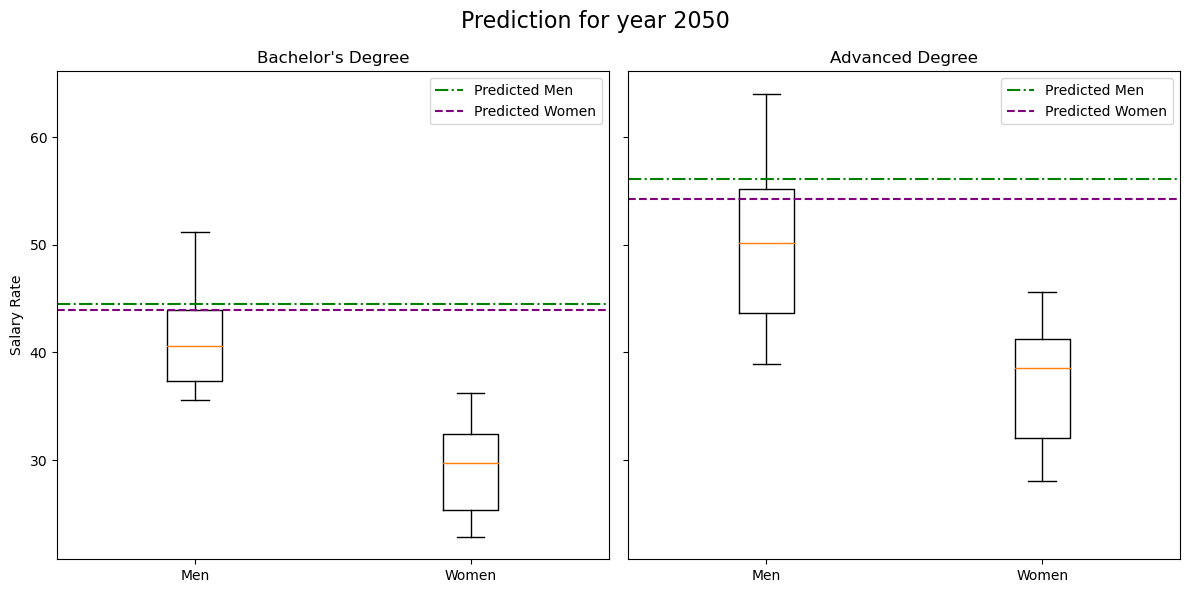

In [51]:
# data
bach = original_df[['white_men_bachelors_degree','white_women_bachelors_degree']]
adv = original_df[['white_men_advanced_degree','white_women_advanced_degree']]

# predictions
pred_men = rf_tuned.predict(new_data_male)[0]
pred_women = rf_tuned.predict(new_data_female)[0]
pred_men_adv = rf_tuned.predict(new_data_male_adv)[0]
pred_women_adv = rf_tuned.predict(new_data_female_adv)[0]

# --------------------------------------------------------------------------
# plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Bachelor's Degree Plot
axes[0].boxplot(bach, widths=0.2)
axes[0].axhline(pred_men, color='green', linestyle='-.', label='Predicted Men')
axes[0].axhline(pred_women, color='purple', linestyle='--', label='Predicted Women')
axes[0].set_title("Bachelor's Degree")
axes[0].set_xticklabels(["Men", "Women"])
axes[0].set_ylabel("Salary Rate")
axes[0].legend()

# Advanced Degree Plot 
axes[1].boxplot(adv, widths=0.2)
axes[1].axhline(pred_men_adv, color='green', linestyle='-.', label='Predicted Men')
axes[1].axhline(pred_women_adv, color='purple', linestyle='--', label='Predicted Women')
axes[1].set_title("Advanced Degree")
axes[1].set_xticklabels(["Men", "Women"])
axes[1].legend()


plt.suptitle("Prediction for year 2050", fontsize=16)
plt.tight_layout()
plt.show();


So, our model predicts the average salaries to increase and the gap to decrease in the next 25 years!

Here is something to look forward to! 👍